In [5]:
import numpy  as np
import pandas as pd
import os

import datetime
import warnings
import pickle
import gc

import seaborn           as sns
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute          import SimpleImputer
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler

from sklearn.cluster      import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.tree         import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_log_error

from IPython.display import display, FileLink, Image

#

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [13, 7]

In [6]:
agr  = pd.read_csv('agrupamento.csv')
clf1 = pd.read_csv('classificacao_Q1.csv')
clf2 = pd.read_csv('classificacao_Q2.csv')
reg1 = pd.read_csv('regressao_Q1.csv')
reg2 = pd.read_csv('regressao_Q2.csv')

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import mean_squared_error

reg = 1.0
mix = 0.01

In [23]:
# TREINO
scores = list()
X = reg1.drop(labels=['target'], inplace=False, axis=1)
y = reg1['target']

for train_id, test_id in KFold(n_splits=5).split(reg1):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  eln = ElasticNet(alpha=reg, l1_ratio=mix)
  eln.fit(X_train, y_train)

  y_pred = eln.predict(X_train)
  scores.append(mean_squared_error(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.26855726289324394,
 0.2687746746994237,
 0.2684418742938754,
 0.2686166246834847,
 0.2686109823290495]

0.26860028377981543

In [24]:
# VALIDACAO
scores = list()
X = reg1.drop(labels=['target'], inplace=False, axis=1)
y = reg1['target']

for train_id, test_id in KFold(n_splits=5).split(reg1):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  eln = ElasticNet(alpha=reg, l1_ratio=mix)
  eln.fit(X_train, y_train)

  y_pred = eln.predict(X_test)
  scores.append(mean_squared_error(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.2869963111887113,
 0.24834889042329172,
 0.27038540877596434,
 0.286636152652695,
 0.25356195595662157]

0.2691857437994568

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import mean_squared_error

kernel = 'linear'
reg = 0.001

In [26]:
# TREINO
scores = list()
X = reg2.drop(labels=['target'], inplace=False, axis=1)
y = reg2['target']

for train_id, test_id in KFold(n_splits=5).split(reg2):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  svm = SVR(kernel=kernel, C=reg)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_train)
  scores.append(mean_squared_error(y_train, y_pred))

display(scores)
display(np.mean(scores))

[20285.36934024859,
 20358.17840392941,
 20277.25177381962,
 20114.158805666022,
 19960.222996435103]

20199.03626401975

In [27]:
# VALIDACAO
scores = list()
X = reg2.drop(labels=['target'], inplace=False, axis=1)
y = reg2['target']

for train_id, test_id in KFold(n_splits=5).split(reg2):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  svm = SVR(kernel=kernel, C=reg)
  svm.fit(X_train, y_train)

  y_pred = svm.predict(X_test)
  scores.append(mean_squared_error(y_test, y_pred))

display(scores)
display(np.mean(scores))

[19860.615607869742,
 19547.28782342194,
 19891.892614244185,
 20551.36675078463,
 21188.23806936625]

20207.880173137346

In [36]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
mean_absolute_percentage_error([0.1, 0.0, 0.2, 0.1], 
                               [0.1, 0.0, 0.2, 0.1])

nan

In [38]:
mean_absolute_percentage_error([0.11, 0.01, 0.2, 0.1], 
                               [0.1, 0.0, 0.2, 0.1])

27.27272727272727

In [39]:
mean_absolute_percentage_error([0.1, 0.2, 0.2, 0.1], 
                               [0.1, 0.0, 0.2, 0.1])

25.0

In [40]:
mean_absolute_percentage_error( [0.1, 0.1, 0.1, 0.1] , 
                               [0.1, 0.0, 0.2, 0.1])

50.0

In [45]:
from sklearn.tree            import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import log_loss

crit = 'entropy'

In [46]:
# TREINO
scores = list()
X = clf1.drop(labels=['target'], inplace=False, axis=1)
y = clf1['target']

for train_id, test_id in KFold(n_splits=10).split(clf1):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  clf = DecisionTreeClassifier(criterion=crit)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_train)
  scores.append(log_loss(y_train, y_pred))

display(scores)
display(np.mean(scores))

[9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16,
 9.992007221626413e-16]

9.992007221626413e-16

In [47]:
# VALIDACAO
scores = list()
X = clf1.drop(labels=['target'], inplace=False, axis=1)
y = clf1['target']

for train_id, test_id in KFold(n_splits=10).split(clf1):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  clf = DecisionTreeClassifier(criterion=crit)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  scores.append(log_loss(y_test, y_pred))

display(scores)
display(np.mean(scores))

[2.878275788322013,
 3.262031086071796,
 4.797114467982166,
 2.3026206306576102,
 3.837699570360035,
 2.6863626017835567,
 4.41333251698471,
 1.5350700552865346,
 2.8782624616981765,
 2.1107163285350454]

3.070148550768164

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics


In [68]:
# TREINO
scores = list()
X = clf2.drop(labels=['target'], inplace=False, axis=1)
y = clf2['target']

for train_id, test_id in KFold(n_splits=10).split(clf2):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  clf = LogisticRegression(penalty='l2', C=0.1)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_train)
  scores.append(roc_auc_score(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.8085763915506071,
 0.80878863517303,
 0.8112449259601158,
 0.804456141792507,
 0.805351681111486,
 0.8044957012789891,
 0.8082114157820531,
 0.8105957648546144,
 0.8067240834386852,
 0.8107928463941122]

0.80792375873362

In [69]:
# TREINO
scores = list()
X = clf2.drop(labels=['target'], inplace=False, axis=1)
y = clf2['target']

for train_id, test_id in KFold(n_splits=10).split(clf2):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  clf = LogisticRegression(penalty='l2', C=0.1)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  scores.append(roc_auc_score(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.7991774307563779,
 0.8109728433469441,
 0.7610939112487101,
 0.8412942989214176,
 0.8167297453332477,
 0.8496380293420462,
 0.8136258363355636,
 0.78222049689441,
 0.8322873975409836,
 0.772703818369453]

0.8079743808089154

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
for i in np.linspace(2.2, 4.6, 10):
    clustering = AgglomerativeClustering(linkage='single', distance_threshold=i, n_clusters=None ).fit(agr)
    print(clustering.n_clusters_)

5
4
4
4
4
4
4
4
4
4


In [91]:
for i in np.linspace(4.7, 6.6, 10):
    clustering = AgglomerativeClustering(linkage='single', distance_threshold=i, n_clusters=None ).fit(agr)
    print(clustering.n_clusters_)

3
3
3
2
2
2
2
2
1
1


In [92]:
for i in np.linspace(4.5, 5.1, 10):
    clustering = AgglomerativeClustering(linkage='single', distance_threshold=i, n_clusters=None ).fit(agr)
    print(clustering.n_clusters_)

4
4
3
3
3
3
3
3
3
3


In [94]:
for i in np.linspace(0.5, 2.2, 10):
    clustering = AgglomerativeClustering(linkage='single', distance_threshold=i, n_clusters=None ).fit(agr)
    print(clustering.n_clusters_)

79
68
53
39
22
15
10
7
6
5


In [ ]:
# TREINO
scores = list()
X = clf2.drop(labels=['target'], inplace=False, axis=1)
y = clf2['target']

for train_id, test_id in KFold(n_splits=10).split(clf2):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  clf = LogisticRegression(penalty=reg, C=lamb)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_train)
  fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred, pos_label=2)
  scores.append(metrics.auc(fpr, tpr))

display(scores)
display(np.mean(scores))

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


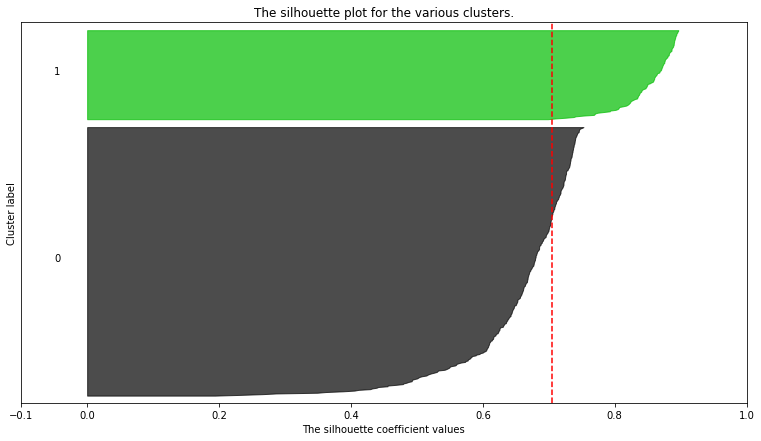

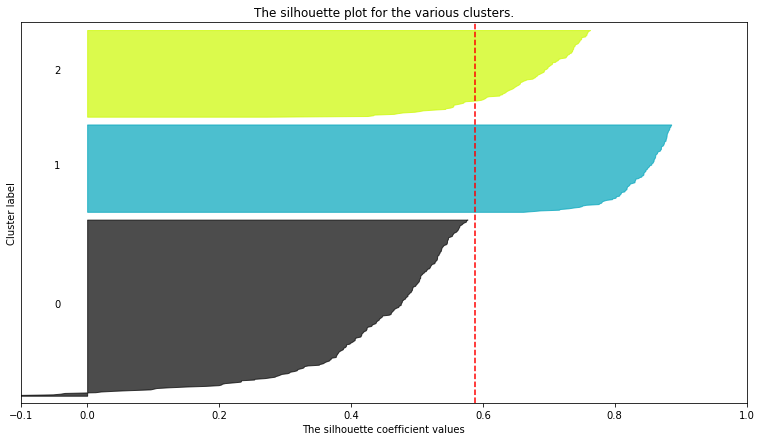

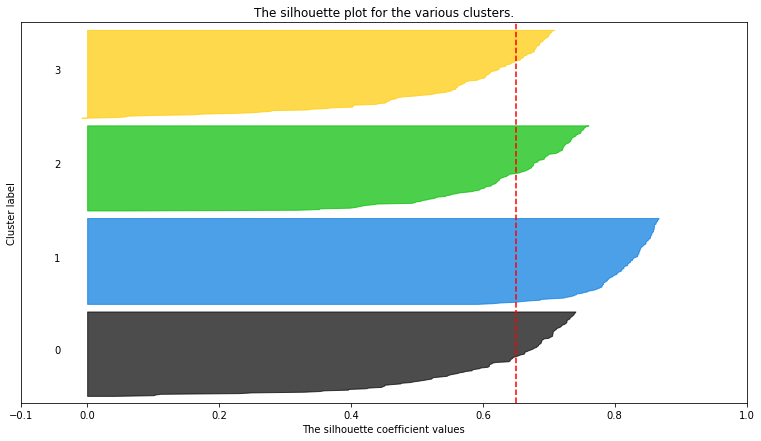

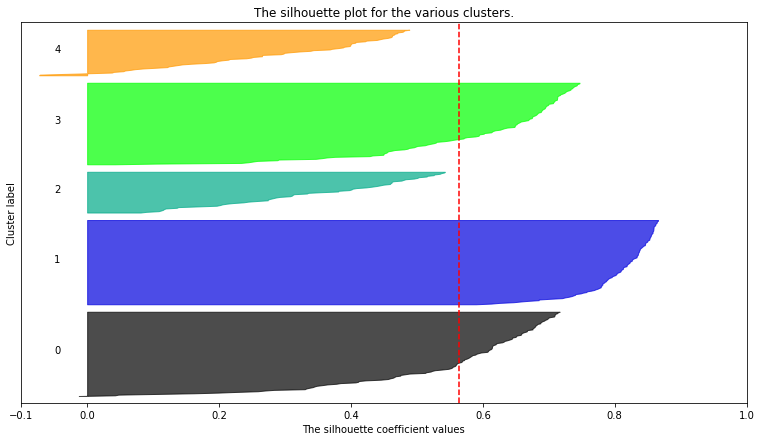

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

for n_clusters in range(2,6):
    # Create a subplot with 1 row and 2 columns
    fig, ((ax1)) = plt.subplots(1, 1)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()